# ResNet50 on Cifar10 dataset

#### Importing necessary libraries

In [1]:
import cv2
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from keras.layers import Convolution2D,MaxPooling2D,Dropout,Dense,Flatten, GlobalAveragePooling2D
from keras import models,losses,optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import InceptionV3,VGG16,ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.models import Model
from keras.layers import Dense, Dropout, Conv2D, GlobalAveragePooling2D
import matplotlib.pyplot as plt
from keras.utils import to_categorical

Using TensorFlow backend.


#### Loading the Dataset and performing inbuilt pre-processing

In [0]:
from keras.datasets import mnist,fashion_mnist,cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = to_categorical(y_train).astype(int)
y_test = to_categorical(y_test).astype(int)

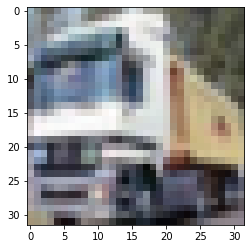

In [3]:
plt.imshow(x_train[1])

#### Function to resize the input image
    - Intitial size : (32x32)
    - Final size : (139x139)

In [0]:
def resize_data(data):
  data_upscaled = []
  for i, img in enumerate(data):
    large_img = cv2.resize(img, dsize=(139, 139))
    data_upscaled.append(large_img)
  return data_upscaled

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


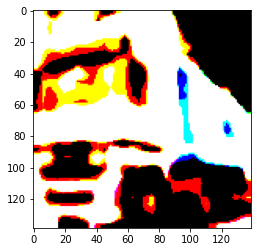

In [8]:
x_train = np.array(resize_data(x_train))
x_test = np.array(resize_data(x_test)) 
x_train = preprocess_input(x_train)
x_test = preprocess_input(x_test)
plt.imshow(x_train[1])

In [9]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(50000, 139, 139, 3) (10000, 139, 139, 3) (50000, 10) (10000, 10)


#### Model Building

In [10]:
base = ResNet50(include_top = False,weights='imagenet',input_shape = (139,139,3))
model = models.Sequential()
model.add(base)
model.add(GlobalAveragePooling2D())
model.add(Dense(4096, activation='relu', name='Dense_Intermediate'))
model.add(Dropout(0.5, name='Dropout_Regularization'))
model.add(Dense(10, activation='softmax', name='Output'))

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 7s 0us/step


#### Freezing the layers of base model

In [0]:
for cnnlayer in model.layers[0].layers:
    cnnlayer.trainable = False
model.layers[0].trainable = False

In [0]:
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 5, 5, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
Dense_Intermediate (Dense)   (None, 4096)              8392704   
_________________________________________________________________
Dropout_Regularization (Drop (None, 4096)              0         
_________________________________________________________________
Output (Dense)               (None, 10)                40970     
Total params: 32,021,386
Trainable params: 8,433,674
Non-trainable params: 23,587,712
_________________________________________________________________


In [14]:
model.fit(x_train,y_train,epochs=10,batch_size=500,validation_data=(x_test,y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 83s 2ms/step - loss: 1.7837 - accuracy: 0.6810 - val_loss: 0.9765 - val_accuracy: 0.7250
Epoch 2/10
50000/50000 [==============================] - 74s 1ms/step - loss: 0.6197 - accuracy: 0.7905 - val_loss: 0.8452 - val_accuracy: 0.7640
Epoch 3/10
50000/50000 [==============================] - 74s 1ms/step - loss: 0.5062 - accuracy: 0.8251 - val_loss: 0.8700 - val_accuracy: 0.7736
Epoch 4/10
50000/50000 [==============================] - 73s 1ms/step - loss: 0.4220 - accuracy: 0.8525 - val_loss: 0.8233 - val_accuracy: 0.7858
Epoch 5/10
50000/50000 [==============================] - 73s 1ms/step - loss: 0.3668 - accuracy: 0.8730 - val_loss: 0.9274 - val_accuracy: 0.7757
Epoch 6/10
50000/50000 [==============================] - 73s 1ms/step - loss: 0.3178 - accuracy: 0.8890 - val_loss: 0.7933 - val_accuracy: 0.8083
Epoch 7/10
50000/50000 [==============================] - 73s 1ms/st

#### Performance Evaluation

In [0]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,log_loss,label_ranking_loss
y_pred = model.predict(x_test)

In [16]:
y_pred = y_pred.round().astype(int)
y_pred

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

In [17]:
classwise_precision = precision_score(y_test,y_pred, average=None)
for i in range(len(classwise_precision)):
  print("Precision for class {} = {}".format(i,classwise_precision[i]))
print("Mean Precision = ",classwise_precision.mean())

Precision for class 0 = 0.8824130879345603
Precision for class 1 = 0.9695863746958637
Precision for class 2 = 0.9673629242819843
Precision for class 3 = 0.8171641791044776
Precision for class 4 = 0.7670648464163823
Precision for class 5 = 0.7690288713910761
Precision for class 6 = 0.9145569620253164
Precision for class 7 = 0.9100310237849017
Precision for class 8 = 0.9382448537378115
Precision for class 9 = 0.7282127031019202
Mean Precision =  0.8663665826474294


In [18]:
classwise_recall = recall_score(y_test,y_pred, average=None)
for i in range(len(classwise_recall)):
  print("Recall for class {} = {}".format(i,classwise_recall[i]))
print("Mean Recall = ",classwise_recall.mean())

Recall for class 0 = 0.863
Recall for class 1 = 0.797
Recall for class 2 = 0.741
Recall for class 3 = 0.657
Recall for class 4 = 0.899
Recall for class 5 = 0.879
Recall for class 6 = 0.867
Recall for class 7 = 0.88
Recall for class 8 = 0.866
Recall for class 9 = 0.986
Mean Recall =  0.8435


In [19]:
print("Log Loss = ",log_loss(y_test,y_pred))

Log Loss =  5.008813352789956
